# Fundamentals of Robot Control
## **Three Link Manipulator (FANUC R-2000iC-165F)**
**RRR Robot**

This project is dedicated to control of the positioning part of FANUC R-2000iC-165F. I need to implement various control techniques on certain and "uncertain" system, analyze and compare results.






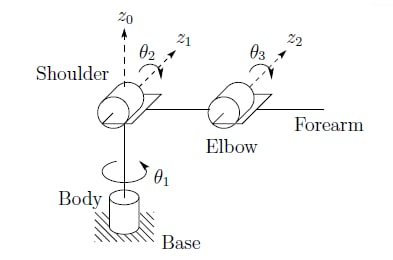

### **3 Dof Robot model**
Steps

1-Recall linearity to parameter property.

2-Define Exact passivity controller in Regressor form. 

3- Incorporate Robustness to parameter uncertainty.

---


Defining generalized coordinates as $\mathbf{q} = [\alpha_1,\alpha_2,\alpha_3]^T$ and forces as $\mathbf{Q} = [u_1,u_2,u_3]^T$ one can apply Lagrange formalism to obtain equations of motion as:

\begin{equation}
\begin{cases} 
b_1\dot{\alpha}_1+\ddot{\alpha}_1*(I_1+I_2+I_3+(L_2^2*m_2)/8 + (L_2^2*m_3)/2 +(L_3^2*m_3)/8 + (L_2^2*m_2*cos(2{\alpha}_2)/8 )+ (L2^2*m3*cos(2*{\alpha}_2))/2 + (L3^2*m3*cos(2*{\alpha}_2 + 2*{\alpha}_3))/8 + (L2*L3*m3*cos({\alpha}_3))/2  + (L2*L3*m3*cos(2*{\alpha}_2 + {\alpha}_3))/2) - \dot{\alpha}_1 *(\dot{\alpha}_2((L2^2*m2*sin(2*{\alpha}_2))/8 + (L2^2*m3*sin(2*{\alpha}_2)))/2 + (L3^2*m3*sin(2*{\alpha}_2 + 2*{\alpha}_3))/8 + (L2*L3*m3*sin(2*{\alpha}_2 + {\alpha}_3))/2)  + (L3\dot{\alpha}_3*m3*(L3*sin(2*{\alpha}_2 + 2*{\alpha}_3) ++ 2*L2*sin({\alpha}_3) + 2*L2*sin(2*{\alpha}_2 + {\alpha}_3)))/8)  - \dot{\alpha}_1*\dot{\alpha}_2*((L2^2*m2*sin(2*{\alpha}_2))/8 + (L2^2*m3*sin(2*{\alpha}_2))/2 + (L3^2*m3*sin(2*{\alpha}_2 + 2*{\alpha}_3))/8 + (L2*L3*m3*sin(2*{\alpha}_2 + {\alpha}_3))/2) - (L3*\dot{\alpha}_1*\dot{\alpha}_3*m3*(L3*sin(2*{\alpha}_2 + 2*{\alpha}_3) + 2*L2*sin({\alpha}_3) + 2*L2*sin(2*{\alpha}_2 + {\alpha}_3)))/8
 =u_1 \\
((L2^2*m2*sin(2*{\alpha}_2))/8 + (L2^2*m3*sin(2*{\alpha}_2))/2 + (L3^2*m3*sin(2*{\alpha}_2 + 2*{\alpha}_3))/8 + (L2*L3*m3*sin(2*{\alpha}_2 + {\alpha}_3))/2)*\dot{\alpha}_1^2 + \ddot{\alpha}_3*((m3*L3^2)/4 + (L2*m3*cos({\alpha}_3)*L3)/2 + I3) + b2*\dot{\alpha}_2+ \ddot{\alpha}_2*(I2 + I3 + (L2^2*m2)/4 + L2^2*m3 + (L3^2*m3)/4 + L2*L3*m3*cos({\alpha}_3)) - g*m3*((L3*(cos({\alpha}_2)*cos({\alpha}_3) - sin({\alpha}_2)*sin({\alpha}_3)))/2 + L2*cos({\alpha}_2)) - (L2*g*m2*cos({\alpha}_2))/2 - (L2*L3*\dot{\alpha}_2*\ddot{\alpha}_3*m3*sin({\alpha}_3))/2 - (L2*L3*\dot{\alpha}_3*m3*sin({\alpha}_3)*(\dot{\alpha}_2 + \dot{\alpha}_3))/2 = u_2
 (L3*m3*(L3*sin(2*{\alpha}_2 + 2*{\alpha}_3) + 2*L2*sin({\alpha}_3) + 2*L2*sin(2*{\alpha}_2 + {\alpha}_3))*\dot{\alpha}_1^2)/8 + (L2*L3*m3*sin({\alpha}_3)*\dot{\alpha}_2^2)/2 + \ddot{\alpha}_2^2*((m3*L3^2)/4 + (L2*m3*cos({\alpha}_3)*L3)/2 + I3) + b3*\dot{\alpha}_3 + \ddot{\alpha}_3*((m3*L3^2)/4 + I3) - (L3*g*m3*(cos({\alpha}_2)*cos({\alpha}_3) - sin({\alpha}_2)*sin({\alpha}_3)))/2 = u_3
\end{cases}
\end{equation}







One may rewrite equation above in matrix form as:
\begin{equation}
\mathbf{Q} = \mathbf{D}(\mathbf{q})\ddot{\mathbf{q}} + \mathbf{h}(\mathbf{q},\dot{\mathbf{q}})
\end{equation}

where inertia matrix and combined effects of link motion and gravity defined as:


\begin{equation}
\mathbf{D}
= 




\begin{bmatrix} 
I_1 +I_2 +I_3 +\frac{{L_2 }^2 \,m_2 }{8}+\frac{{L_2 }^2 \,m_3 }{2}+\frac{{L_3 }^2 \,m_3 }{8}+\frac{{L_2 }^2 \,m_2 \,\mathrm{cos}\left(2\,{\alpha}_2 \right)}{8}+\frac{{L_2 }^2 \,m_3 \,\mathrm{cos}\left(2\,{\alpha}_2 \right)}{2}+\frac{{L_3 }^2 \,m_3 \,\mathrm{cos}\left(2\,{\alpha}_2 +2\,{\alpha}_23 \right)}{8}+\frac{\sigma_1 }{2}+\frac{L_2 \,L_3 \,m_3 \,\mathrm{cos}\left(2\,{\alpha}_2 +{\alpha}_3 \right)}{2} & 0 &  0 \\
0 & I_2 +I_3 +\frac{{L_2 }^2 \,m_2 }{4}+{L_2 }^2 \,m_3 +\frac{{L_3 }^2 \,m_3 }{4}+\sigma_1 & \sigma_2\\
0 & \sigma_2 & \sigma_3 +I_3 
\end{bmatrix}
\end{equation}
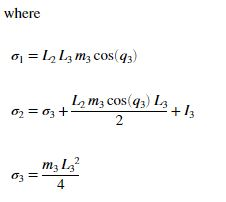

**Details for the D matrix :**
\begin{equation}
1. D(1,1) =I1 + I2 + I3 + (L2^2*m2)/8 + (L2^2*m3)/2 + (L3^2*m3)/8 + (L2^2*m2*cos(2*{\alpha}_2))/8 + (L2^2*m3*cos(2*{\alpha}_2))/2 + (L3^2*m3*cos(2*{\alpha}_2 + 2*{\alpha}_3))/8 + (L2*L3*m3*cos({\alpha}_3))/2 + (L2*L3*m3*cos(2*{\alpha}_2 + {\alpha}_3))/2 \\  
2.  D(1,2) = 0 \\ 
3. D(1,3) = 0 \\ 
4. D(2,1) = 0 \\ 
5. D(2,2) = I2 + I3 + (L2^2*m2)/4 + L2^2*m3 + (L3^2*m3)/4 + L2*L3*m3*cos({\alpha}_3) \\
6.D(2,3) = (m3*L3^2)/4 + (L2*m3*cos({\alpha}_3))*L3)/2 + I3\\
7.D(3,1) = 0 \\ 
8.D(3,2) = (m3*L3^2)/4 + (L2*m3*cos({\alpha}_3)*L3)/2 + I3 \\
9.D(3,3) = (m3*L3^2)/4 + I3 \\ 

\end{equation}



**Now it is time to calculate the h**
\begin{equation}
\mathbf{C}(\mathbf{q},\dot{\mathbf{q}}) + \mathbf{g}(\mathbf{q})={h}(\mathbf{q},\dot{\mathbf{q}})
\end{equation}

\begin{equation}




\mathbf{h} = \begin{bmatrix}
b_1 \,{\textrm{dq}}_1 -{\textrm{dq}}_1 \,{\left({\textrm{dq}}_2 \,\sigma_2 +\frac{L_3 \,{\textrm{dq}}_3 \,m_3 \,\sigma_3 }{8}\right)}-{\textrm{dq}}_1 \,{\textrm{dq}}_2 \,\sigma_2 -\frac{L_3 \,{\textrm{dq}}_1 \,{\textrm{dq}}_3 \,m_3 \,\sigma_3 }{8} \\
\sigma_2 \,{{\textrm{dq}}_1 }^2 +b_2 \,{\textrm{dq}}_2 -g\,m_3 \,{\left(\frac{L_3 \,\sigma_1 }{2}+L_2 \,\mathrm{cos}\left(q_2 \right)\right)}-\frac{L_2 \,g\,m_2 \,\mathrm{cos}\left(q_2 \right)}{2}-\frac{L_2 \,L_3 \,{\textrm{dq}}_2 \,{\textrm{dq}}_3 \,m_3 \,\mathrm{sin}\left(q_3 \right)}{2}-\frac{L_2 \,L_3 \,{\textrm{dq}}_3 \,m_3 \,\mathrm{sin}\left(q_3 \right)\,{\left({\textrm{dq}}_2 +{\textrm{dq}}_3 \right)}}{2} \\
\frac{L_3 \,m_3 \,\sigma_3 \,{{\textrm{dq}}_1 }^2 }{8}+\frac{L_2 \,L_3 \,m_3 \,\mathrm{sin}\left(q_3 \right)\,{{\textrm{dq}}_2 }^2 }{2}+b_3 \,{\textrm{dq}}_3 -\frac{L_3 \,g\,m_3 \,\sigma_1 }{2}
\end{bmatrix}
\end{equation}
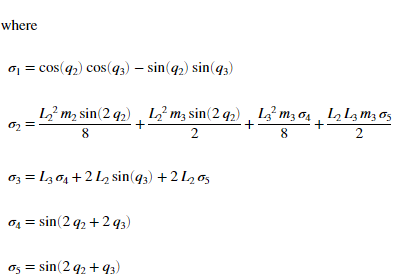

**Details for the h martix:**



**First Row**
\begin{equation}
b1* \dot{\alpha_1} - \dot{\alpha_1}*[\dot{\alpha_2}*((L2^2*m2*sin(2*{\alpha_2}))/8 + (L2^2*m3*sin(2*{\alpha_2}))/2 + (L3^2*m3*sin(2*{\alpha_2} + 2*{\alpha_3}))/8 + (L2*L3*m3*sin(2*{\alpha_2} + {\alpha_3}))/2) + (L3*\dot{\alpha_3}*m3*(L3*sin(2*{\alpha_2} + 2*{\alpha_3}) + 2*L2*sin({\alpha_3}) + 2*L2*sin(2*{\alpha_2} + {\alpha_3})))/8] - \dot{\alpha_1}*\dot{\alpha_2}*((L2^2*m2*sin(2*{\alpha_2}))/8 + (L2^2*m3*sin(2*{\alpha_2}))/2 + (L3^2*m3*sin(2*{\alpha_2} + 2*{\alpha_3}))/8 + (L2*L3*m3*sin(2*{\alpha_2} + {\alpha_3}))/2) - (L3*\dot{\alpha_1}*\dot{\alpha_3}*m3*(L3*sin(2*{\alpha_2} + 2*{\alpha_3}) + 2*L2*sin({\alpha_3}) + 2*L2*sin(2*{\alpha_2} + {\alpha_3})))/8 \\
 \end{equation}
  **Second Row**  
  \begin{equation} 
                                                                          ((L2^2*m2*sin(2*{\alpha_2}))/8 + (L2^2*m3*sin(2*{\alpha_2}))/2 + (L3^2*m3*sin(2*{\alpha_2} + 2*{\alpha_3}))/8 + (L2*L3*m3*sin(2*{\alpha_2} + {\alpha_3}))/2)*\dot{\alpha_1}^2 + b2*\dot{\alpha_2} - g*m3*((L3*(cos({\alpha_2})*cos({\alpha_3}) - sin({\alpha_2})*sin({\alpha_3})))/2 + L2*cos({\alpha_2})) - (L2*g*m2*cos({\alpha_2}))/2 - (L2*L3*\dot{\alpha_2}*dot{\alpha_3}*m3*sin({\alpha_3}))/2 - (L2*L3*\dot{\alpha_3}*m3*sin({\alpha_3})*(\dot{\alpha_2} + \dot{\alpha_3}))/2
 \end{equation}
                                                                                    **Third Row**  
  \begin{equation}                                                                           
                                                                               (L3*m3*(L3*sin(2*{\alpha_2} + 2*{\alpha_3}) + 2*L2*sin({\alpha_3}) + 2*L2*sin(2*{\alpha_2} + {\alpha_3}))*\dot{\alpha_1}^2 )/8 + (L2*L3*m3*sin({\alpha_3})*dot{\alpha_2}^2)/2 + b3*\dot{\alpha_3} - (L3*g*m3*(cos({\alpha_2})*cos({\alpha_3}) - sin({\alpha_2})*sin({\alpha_3})))/2
\end{equation}



Defining vector of parameters $\mathbf{p} = [\mathbf{p}_1, \mathbf{p}_2,\mathbf{p}_3]$ with $\mathbf{p}_i = [m_i, I_i, b_i]$ we may define linear representation of dynamics $\mathbf{Q} = \mathbf{Y}\mathbf{p}$ with following regressor:

\begin{equation}
\mathbf{Y} = 
\begin{bmatrix}
0 & \ddot{\alpha_1} & 
\dot{\alpha_1} & 
x1_1 &\ddot{\alpha_1} & 0 & x1_2 & \ddot{\alpha_1} & 0 \\
0 & 0 & 0 & x2_1 & \ddot{\alpha_2} & \dot{\alpha_2} & x2_2 & \ddot{\alpha_2} + \ddot{\alpha_3} & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & x3_1 &  \ddot{\alpha_2} + \ddot{\alpha_3} & \dot{\alpha_3}
\end{bmatrix}
\end{equation}


# The Terms ( x11,x12,x21,x22,x31) are as follows :
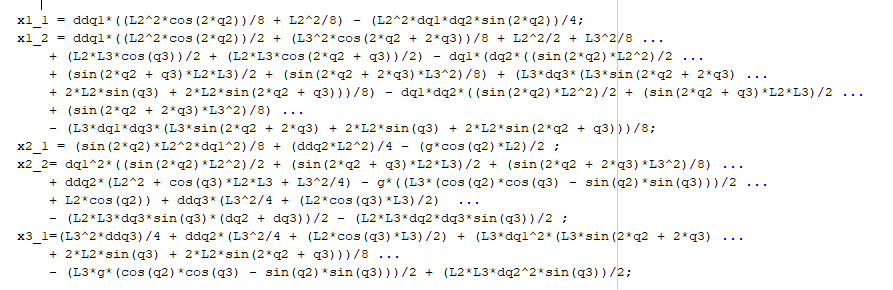

Code below provides implementation of system dynamics and regressor. 

In [ ]:

from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv


def D(q, params):
    alpha_1, alpha_2 ,alpha_3 = q
    l, m, J, b, g = params
    
    d11 =J[0] + J[1] + J[2] + ((l[1]**2)*m[1])/8 + ((l[1]**2)*m[2])/2 + ((l[2]**2)*m[2])/8 + ((l[1]**2)*m[1]*cos(2*alpha_2))/8
    + ((l[1]**2)*m[2]*cos(2*alpha_2))/2 + ((l[2]**2)*m[2]*cos(2*alpha_2+2*alpha_3))/8 +  (l[1]*l[2]*m[2]*cos(alpha_3))/2 
    +(l[1]*l[2]*m[2]*cos(2*alpha_2+alpha_3))/2
    d12 = 0
    d13 = 0 
    d21 = d12
    d22 = J[1] + J[2] + ((l[1]**2)*m[1])/4 + ((l[1]**3) * m[2]) + ((l[2]**2)*m[2]/4) + (l[1]*l[2]*m[2]*cos(alpha_3))
    d23 = (m[2]*l[2]**2)/4 + ((l[1]*m[2]*cos(alpha_3))*l[2])/2 + J[2]
    d31 = d13 
    d32 = d23 
    d33 = (m[2]*l[2]**2)/4 + J[2]
    return array([[d11,d12,d13],[d21,d22,d23],[d31,d32,d33]])
  
    
def h(q, dq, params):
    alpha_1, alpha_2 , alpha_3= q
    dalpha_1, dalpha_2  , dalpha_3 = dq
    
    l, m, J, b, g = params

    g1 = 0 
    g2 = -g *m[2]*((l[2]*(cos(alpha_2)*cos(alpha_3)-sin(alpha_2)*sin(alpha_3)))/2+l[1]*cos(alpha_2))-(l[1]*g*m[1]*cos(alpha_2))/2
    g3 = -(l[2]*g*m[2]*(cos(alpha_2)*cos(alpha_3)-sin(alpha_2)*sin(alpha_3)))/2

    c1 = - dalpha_1 *(dalpha_2*((l[1]**2*m[2]*sin(2*alpha_2))/8 + (l[1]**2*m[2]*sin(2*alpha_2 ))/2 
          + (l[2]**2*m[2]*sin(2*alpha_2+2*alpha_3))/8 + (l[1]*l[2]*m[2]*sin(2*alpha_2+alpha_3))/2) 
          + (l[2]*dalpha_3*m[2]*(l[2]*sin(2*alpha_2+2*alpha_3)+2*l[1]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+alpha_3)))/8)
    - dalpha_1*dalpha_2*((l[1]**2*m[1]*sin(2*alpha_2))/8 + (l[1]**2*m[2]*sin(2*alpha_2))/2
                         +(l[2]**2*m[2]*sin(2*alpha_2+2*alpha_3))/8 + (l[1]*l[2]*m[2]*sin(2*alpha_2+ alpha_3))/2) 
    - (l[2]*dalpha_1*dalpha_3*m[2]*(l[2]*sin(2*alpha_2+2*alpha_3)+2*l[1]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+ alpha_3)))/8

    c2 = ((l[1]**2*m[1]*sin(2*alpha_2))/8+(l[1]**2*m[2]*sin(2*alpha_2))/2+(l[2]**2*m[2]*sin(2*alpha_2+2*alpha_3))/8
    +(l[1]*l[2]*sin(2*alpha_2+alpha_3))/2)*dalpha_1**2 - (l[1]*l[2]*dalpha_2*dalpha_3*m[2]*sin(alpha_3))/2 
    -(l[1]*l[2]*dalpha_3*m[2]*sin(alpha_3)*(dalpha_2 + dalpha_3))/2 

    c3 = (l[2]*m[2]*(l[2]*sin(2*alpha_2+2*alpha_3)+2*l[1]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+alpha_3))*dalpha_1**2)/8 
    +(l[1]*l[2]*m[2]*sin(alpha_3)*dalpha_2**2)/2
    
    h1 = c1 + g1 + b[0]*dalpha_1
    h2 = c2 + g2 + b[1]*dalpha_2
    h3 = c3 + g3 + b[2]*dalpha_3

    return array([h1, h2,h3])

def regressor(q, dq, ddq, l, g):

    alpha_1, alpha_2  , alpha_3 = q
    dalpha_1, dalpha_2, dalpha_3 = dq
    ddalpha_1, ddalpha_2, ddalpha_3 = ddq

    Y = zeros((3,9))
   
    # Joint 1
   
    Y[0,1] = ddalpha_1
    Y[0,2] = dalpha_1
    Y[0,3] = ddalpha_1*((l[1]**2*cos(2*alpha_2))/8+l[1]**2/8)-(l[1]**2*dalpha_1*dalpha_2*sin(2*alpha_2))/4
    Y[0,4] = ddalpha_1  
    Y[0,6] = ddalpha_1 *((l[1]**2*cos(2*alpha_2))/2+(l[2]**2*cos(2*alpha_2+2*alpha_3))/8+l[1]**2/2+l[2]**2/8   
            + (l[1]*l[2]*cos(alpha_3))/2+ (l[1]*l[2]*cos(2*alpha_2+alpha_3))/2)     \
            - dalpha_1*(dalpha_2*((sin(2*alpha_2)*l[1]**2)/2 + (sin(2*alpha_2+alpha_3)*l[1]*l[2])/2        \
            +(sin(2*alpha_2+2*alpha_3)*l[2]**2)/8) + (l[2]*dalpha_3*(l[2]*sin(2*alpha_2+2*alpha_3)          
            + 2*l[1]*sin(alpha_3) + 2*l[1]*sin(alpha_2+alpha_3)))/8)                                         \
            - dalpha_1*dalpha_2*((sin(2*alpha_2)*l[1]**2)/2+sin(2*alpha_2+alpha_3)*l[1]*l[2])/2 + (sin(2*alpha_2+alpha_3)*l[2]**2)/8       \
            - (l[2]*dalpha_1*dalpha_3)*(l[2]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+alpha_3))/8   
                          
    Y[0,7] = ddalpha_1  

    # Joint 2
    Y[1,3] = (sin(2*alpha_2)*l[1]**2*dalpha_1**2)/8 + (ddalpha_2*l[1]**2)/4 -(g*cos(alpha_2)*l[1])/2
    Y[1,4] = ddalpha_2
    Y[1,5] = dalpha_2
    Y[1,6] = (dalpha_1**2)*((sin(2*alpha_2)*l[1]**2)/2+(sin(2*alpha_2+alpha_3)*l[1]*l[2])/2+(sin(2*alpha_2+2*alpha_3)*l[2]**2)/8) \
    +ddalpha_2*(l[1]**2+cos(alpha_3)*l[1]*l[2]+l[2]**2/4) \
    - g *((l[2]*(cos(alpha_2)*cos(alpha_3)-sin(alpha_2)*sin(alpha_3)))/2+ l[1]*cos(alpha_2)) \
    + ddalpha_3*(l[2]**2/4 + (l[1]*cos(alpha_3)*l[2])/2)-(l[1]*l[2]*ddalpha_3*sin(alpha_3)*(dalpha_2+dalpha_3))/2 \
    - (l[1]*l[2]*dalpha_2*dalpha_3*sin(alpha_3))/2 
    Y[1,6] = ddalpha_2 + ddalpha_3

    # Joint 3
    Y[2,6] = (l[2]**2*ddalpha_3)/4  +  ddalpha_2*(l[2]**2/4+(l[1]*cos(alpha_3)*l[2])/2) + (l[2]*dalpha_1**2*(l[2]*sin(2*alpha_2+2*alpha_3) \
    +2*l[1]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+alpha_3)))/8 - (l[2]*g*(cos(alpha_2)*cos(alpha_3)- sin(alpha_2)*sin(alpha_3)))/2 \
    +(l[1]*l[2]*dalpha_2**2*sin(alpha_3))/2


    Y[2,7] = ddalpha_2 + ddalpha_3
    Y[2,8] = dalpha_3

    return Y


Let us now simulate response of the controller above for particular case of remotely driven manipulator, first we define system ODE

In [ ]:

def sysode(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    ddq = dot(inv(Dm), u - hm )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)


Now we implement passivity controller in regressor form:

In [ ]:
def control(x, t, control_params):
    q, dq = x[:3], x[3:6]
    trajectory_params, gains, params_hat = control_params
    
    l, m, J, b, g = control_params['params']

    q_d, dq_d, ddq_d = trajectory(t, control_params['trajectory_params'])
    
    Lambda, K = control_params['gains']

    e, de = q_d - q, dq_d - dq 
    
    # Change of variables
    q_star = de + dot(Lambda,e)
    dq_s = dq_d + dot(Lambda,e)
    ddq_s = ddq_d + dot(Lambda,de)
    # parameters
    p = [m[0], J[0], b[0], m[1], J[1], b[1], m[2], J[2], b[2]  ] 
    # Controller
    u = dot(regressor(q, dq_s, ddq_s , l, g), p) + dot(K, q_star)

    return u    

Let us first consider **regulation** to the desired state:

In [ ]:
def trajectory(t, trajectory_params):
    q_d  = trajectory_params['q_d']
    n = len(q_d)
    dq_d = zeros(n)
    ddq_d  = zeros(n)
    return q_d, dq_d, ddq_d

Controller parameters are defined below:

In [ ]:
# Manipulator parameters
l = 0.3, 0.3 ,0.3
m = 0.5, 2.0  , 0.5
J = 0.01, 0.01 , 0.01
b = 0.02, 0.02 , 0.02
g = 9.81

params = l, m, J, b, g

control_params = {}
control_params['trajectory_params'] = {'q_d':[pi/3, pi/4,pi/4]}

Lambda = diag([4, 4, 4])
K = diag([2, 2, 2 ])
control_params['gains'] = Lambda, K
control_params['params'] = params


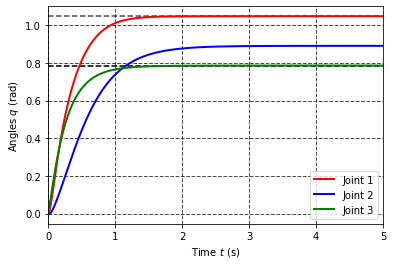

In [ ]:
from scipy.integrate import odeint

# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
x0 = [0, 0, 0, 0 ,0, 0 ,] # Set initial state 
sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q_exct, dq_exct = sol[:,:3], sol[:,3:6]
alpha_1_exct, alpha_2_exct, alpha_3_exct = q_exct[:,0], q_exct[:,1], q_exct[:,2]

from matplotlib.pyplot import *
plot(t, alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')
#plot(t,sin(2*t), color = 'black', linestyle = '--', alpha = 0.7)
#plot(t,cos(2*t), color = 'black', linestyle = '--', alpha = 0.7)
hlines(control_params['trajectory_params']['q_d'][0], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(control_params['trajectory_params']['q_d'][1], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(control_params['trajectory_params']['q_d'][2], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

Now let us test the controller on **tracking** problem :

In [ ]:
def trajectory(t, trajectory_params):
    q_d  = sin(2*t), cos(2*t), sin(t)
    n = len(q_d)
    dq_d = 2*cos(2*t), - 2*sin(2*t), cos(t)
    ddq_d  = -4*sin(2*t),  - 4*cos(2*t), -sin(t)
    return q_d, dq_d, ddq_d

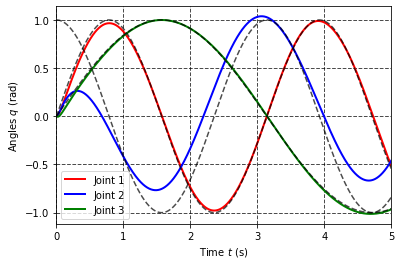

In [ ]:
sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q_exct, dq_exct = sol[:,:3], sol[:,3:6]
alpha_1_exct, alpha_2_exct, alpha_3_exct = q_exct[:,0], q_exct[:,1], q_exct[:,2]
alpha_1_d, alpha_2_d, alpha_3_d = trajectory(t, control_params['trajectory_params'])[0]

plot(t, alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')
plot(t, alpha_1_d, color = 'black', linestyle = '--', alpha = 0.7)
plot(t,alpha_2_d, color = 'black', linestyle = '--', alpha = 0.7)
plot(t,alpha_3_d, color = 'black', linestyle = '--', alpha = 0.7)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

### **Uncertaint system, Error Dynamics.**

Consider now case where we know only parameter estimates $\hat{\mathbf{p}}$, such that parameter uncertainty is given by $\mathbf{\tilde{p}} = \hat{\mathbf{p}} - \mathbf{p}$ and controller above will be written as:
\begin{equation}
\mathbf{u} = \mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\dot{\mathbf{q}}_s,\ddot{\mathbf{q}}_s)\hat{\mathbf{p}} + \mathbf{K}\tilde{\mathbf{q}}^{*}
\end{equation}
Substitution of the controller to system dynamics yields:
\begin{equation}
\mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\dot{\mathbf{q}}_s,\ddot{\mathbf{q}}_s)\tilde{\mathbf{p}} + \mathbf{D} \dot{\tilde{\mathbf{q}}}^{*} + \mathbf{C}\tilde{\mathbf{q}}^{*} + \mathbf{K}\mathbf{\tilde{q}}^{*} = 0
\end{equation}

using same Lyapunov candidate we can deduce that:
\begin{equation}
\dot{V} = -\tilde{\mathbf{q}}^T\mathbf{\Lambda}^T{\mathbf{K}}\mathbf{\Lambda}\tilde{\mathbf{q}} -\dot{\tilde{\mathbf{q}}}^T{\mathbf{K}}\dot{\tilde{\mathbf{q}}} -{\tilde{\mathbf{q}}^{*}}^T\mathbf{Y}\tilde{\mathbf{p}}=  -\mathbf{e}^T{\mathbf{Q}}\mathbf{e} -{\tilde{\mathbf{q}}^{*}}^T\mathbf{Y}\tilde{\mathbf{p}}
\end{equation}



Let us simulate system response:

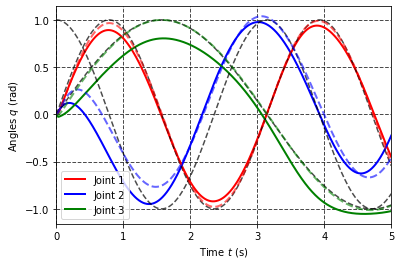

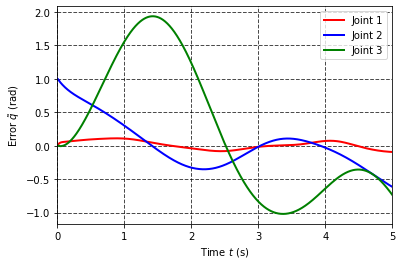

In [ ]:
# Set parameter guess
m_hat = 0.4, 1.5 , 1.5
b_hat = 0.0, 0.0 , 0.0 
g = 9.81

params_hat = l, m_hat, J, b_hat, g
control_params['params'] = params_hat

sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q_aprox, dq_aprox = sol[:,:3], sol[:,3:6]
alpha_1_aprox, alpha_2_aprox, alpha_3_aprox = q_aprox[:,0], q_aprox[:,1], q_aprox[:,2]

plot(t, alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')
plot(t, alpha_1_d, color = 'black', linestyle = '--', alpha = 0.7)
plot(t,alpha_2_d, color = 'black', linestyle = '--', alpha = 0.7)
plot(t,alpha_3_d, color = 'black', linestyle = '--', alpha = 0.7)
plot(t, alpha_1_exct,'r--', linewidth=2.0, alpha = 0.6)
plot(t, alpha_2_exct,'b--', linewidth=2.0, alpha = 0.6)
plot(t, alpha_3_exct,'g--', linewidth=2.0, alpha = 0.6)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

plot(t, alpha_1_d - alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_d - alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_d - alpha_2_aprox,'g', linewidth=2.0, label = 'Joint 3')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()


As can be seen from the graph above, the parameter uncertainty acts as a disturbance at all joints. 

Let us add robustness to our controller via additional term that acts in space of parameters.

### **Robustness**
Let us consider additional term in our controller:
\begin{equation}
\mathbf{u} = \mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\dot{\mathbf{q}}_s,\ddot{\mathbf{q}}_s)(\hat{\mathbf{p}}+\delta\mathbf{p}) + \mathbf{K}\tilde{\mathbf{q}}^{*}
\end{equation}
A derivative of previous Lyapunov function then become:
\begin{equation}
\dot{V} = -\tilde{\mathbf{q}}^T\mathbf{\Lambda}^T{\mathbf{K}}\mathbf{\Lambda}\tilde{\mathbf{q}} -\dot{\tilde{\mathbf{q}}}^T{\mathbf{K}}\dot{\tilde{\mathbf{q}}} -{\tilde{\mathbf{q}}^{*}}^T\mathbf{Y}(\tilde{\mathbf{p}}+\delta\mathbf{p}) =  -\mathbf{e}^T{\mathbf{Q}}\mathbf{e} -{\tilde{\mathbf{q}}^{*}}^T\mathbf{Y}(\tilde{\mathbf{p}}+\delta\mathbf{p})
\end{equation}

Now the question is how to find such $\delta\mathbf{p}$ that implies ${\tilde{\mathbf{q}}^{*}}^T\mathbf{Y}(\tilde{\mathbf{p}}+\delta\mathbf{p}) < 0$. 

In case if one define bounds on uncertainty in parameters such that:
\begin{equation}
\rho > \|\tilde{\mathbf{p}}\|
\end{equation}
Then a vector $\delta \mathbf{p}$ may be defined as follows:
\begin{equation}
\delta \mathbf{p} = \rho \frac{\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}}{\|\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}\|} 
\end{equation}
$a^T b \leq \|a\|\|b\|$

Thus:

\begin{equation}
{\tilde{\mathbf{q}}^{*}}^T\mathbf{Y}(\tilde{\mathbf{p}}+\delta\mathbf{p}) = {\tilde{\mathbf{q}}^{*}}^T\mathbf{Y}\tilde{\mathbf{p}} + \rho\|\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}\|
\end{equation}
Now it is easy to show:
\begin{equation}
 \rho\|\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}\| > \|\tilde{\mathbf{p}}\|\|\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}\|\geq {\tilde{\mathbf{q}}^{*}}^T\mathbf{Y}\tilde{\mathbf{p}}
\end{equation}
And finally:
\begin{equation}
 {\tilde{\mathbf{q}}^{*}}^T\mathbf{Y}(\tilde{\mathbf{p}}+\delta\mathbf{p}) < 0\rightarrow\dot{V} < 0 
\end{equation}

However in case of convergence to sliding surface controller defined above is singular, in practice we define a **boundary layer** $\epsilon$ such that:

\begin{equation}
\delta \mathbf{p} = 
\begin{cases}
\rho \frac{\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}}{\|\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}\|} \quad \text{if} \quad \|\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}\|> \epsilon  \\  
\rho \frac{\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}}{\epsilon} \quad \text{if} \quad \|\mathbf{Y}^T{\tilde{\mathbf{q}}}^{*}\|\leq  \epsilon 
\end{cases}
\end{equation}



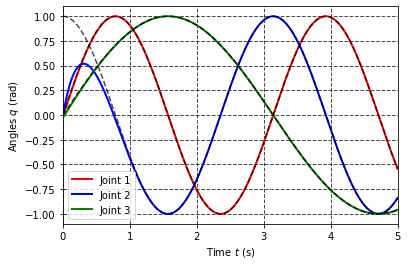

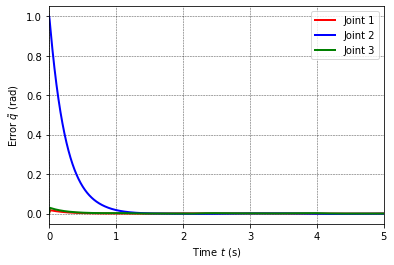

In [ ]:
from numpy.linalg import norm

def control(x, t, control_params):
    q, dq = x[:3], x[3:6]
    
    l, m, J, b, g = control_params['params']

    q_d, dq_d, ddq_d = trajectory(t, control_params['trajectory_params'])
    
    Lambda, K = control_params['gains']
    # change of variables
    e, de = q_d - q, dq_d - dq
    q_star = de + dot(Lambda,e)
    dq_s = dq_d + dot(Lambda,e)
    ddq_s = ddq_d + dot(Lambda,de)
    
    Y = regressor(q, dq_s, ddq_s , l, g)
    Y_dot_q = dot(Y.T, q_star)
    eps = control_params['eps']
    rho = control_params['rho']
    
    if norm(Y_dot_q)>eps:
      delta_p = rho*Y_dot_q/norm(Y_dot_q)
    else:
      delta_p = rho*Y_dot_q/eps

    p = [m[0], J[0], b[0], m[1], J[1], b[1] ,m[2], J[2], b[2]] 
    u = dot(Y, p+delta_p) + dot(K, q_star)

    return u    

p = [m[0], J[0], b[0], m[1], J[1], b[1] , m[2], J[2], b[2]] 

control_params['eps'] = 0.1
control_params['rho'] = 5

sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q_aprox, dq_aprox = sol[:,:3], sol[:,3:6]
alpha_1_aprox, alpha_2_aprox, alpha_3_aprox = q_aprox[:,0], q_aprox[:,1], q_aprox[:,2]

plot(t, alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')
plot(t, alpha_1_d, color = 'black', linestyle = '--', alpha = 0.7)
plot(t,alpha_2_d, color = 'black', linestyle = '--', alpha = 0.7)
plot(t,alpha_3_d, color = 'black', linestyle = '--', alpha = 0.7)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()


plot(t, alpha_1_d - alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_d - alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_d - alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')
grid(color='black', linestyle='--', linewidth=0.5, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()
    

# PD + Feed-back linearization  Control 
### **Three Link Manipulator**
---
Steps :
*   Recall linearity to parameters property
*   Deduce the origin of the linearity property
*   Define a feedback controllers in regressor form. 
*   Model the System Response


For instance let's consider remotely driven  3-DoF manipulator:
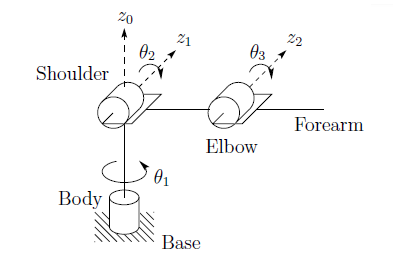

#### **Energy**
Kinetic and potential energy of this system is equal to:
\begin{equation}
E_K = \frac{1}{2}\sum_{j=1}^{2}  m_j\dot{\mathbf{r}}_j^T\dot{\mathbf{r}}_j  +  J_j \dot{\alpha}^2_i, \quad E_\Pi = \sum_{j=1}^{n}  m_i g y_i  
\end{equation}


Apart from kinetic and potential energy there are three dissipative elements in this system, namely "dampers" with coefficients $b_1, b_2$, $b_3$ (viscous friction), their dissipation function is given as:
\begin{equation}
\mathcal{R} = \frac{1}{2}\sum_{j=1}^{n}  b_j \dot{\alpha}^2_j
\end{equation}

# Dynamics
\begin{bmatrix} 
I_1 +I_2 +I_3 +\frac{{L_2 }^2 \,m_2 }{8}+\frac{{L_2 }^2 \,m_3 }{2}+\frac{{L_3 }^2 \,m_3 }{8}+\frac{{L_2 }^2 \,m_2 \,\mathrm{cos}\left(2\,{\alpha}_2 \right)}{8}+\frac{{L_2 }^2 \,m_3 \,\mathrm{cos}\left(2\,{\alpha}_2 \right)}{2}+\frac{{L_3 }^2 \,m_3 \,\mathrm{cos}\left(2\,{\alpha}_2 +2\,{\alpha}_23 \right)}{8}+\frac{\sigma_1 }{2}+\frac{L_2 \,L_3 \,m_3 \,\mathrm{cos}\left(2\,{\alpha}_2 +{\alpha}_3 \right)}{2} & 0 &  0 \\
0 & I_2 +I_3 +\frac{{L_2 }^2 \,m_2 }{4}+{L_2 }^2 \,m_3 +\frac{{L_3 }^2 \,m_3 }{4}+\sigma_1 & \sigma_2\\
0 & \sigma_2 & \sigma_3 +I_3 
\end{bmatrix}
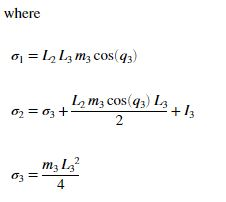

Write equations  in matrix form as:
\begin{equation}
\mathbf{Q} = \mathbf{D}(\mathbf{q})\ddot{\mathbf{q}} + \mathbf{h}(\mathbf{q},\dot{\mathbf{q}})
\end{equation}






\begin{equation}
\mathbf{h} = \begin{bmatrix}
b_1 \,{\textrm{dq}}_1 -{\textrm{dq}}_1 \,{\left({\textrm{dq}}_2 \,\sigma_2 +\frac{L_3 \,{\textrm{dq}}_3 \,m_3 \,\sigma_3 }{8}\right)}-{\textrm{dq}}_1 \,{\textrm{dq}}_2 \,\sigma_2 -\frac{L_3 \,{\textrm{dq}}_1 \,{\textrm{dq}}_3 \,m_3 \,\sigma_3 }{8} \\
\sigma_2 \,{{\textrm{dq}}_1 }^2 +b_2 \,{\textrm{dq}}_2 -g\,m_3 \,{\left(\frac{L_3 \,\sigma_1 }{2}+L_2 \,\mathrm{cos}\left(q_2 \right)\right)}-\frac{L_2 \,g\,m_2 \,\mathrm{cos}\left(q_2 \right)}{2}-\frac{L_2 \,L_3 \,{\textrm{dq}}_2 \,{\textrm{dq}}_3 \,m_3 \,\mathrm{sin}\left(q_3 \right)}{2}-\frac{L_2 \,L_3 \,{\textrm{dq}}_3 \,m_3 \,\mathrm{sin}\left(q_3 \right)\,{\left({\textrm{dq}}_2 +{\textrm{dq}}_3 \right)}}{2} \\
\frac{L_3 \,m_3 \,\sigma_3 \,{{\textrm{dq}}_1 }^2 }{8}+\frac{L_2 \,L_3 \,m_3 \,\mathrm{sin}\left(q_3 \right)\,{{\textrm{dq}}_2 }^2 }{2}+b_3 \,{\textrm{dq}}_3 -\frac{L_3 \,g\,m_3 \,\sigma_1 }{2}
\end{bmatrix}
\end{equation}
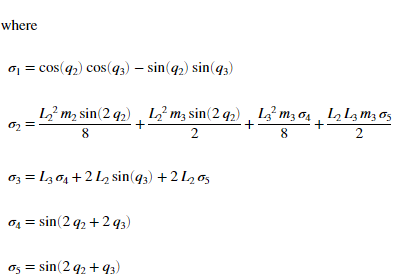

Code below provides implementation of system dynamics

In [6]:

from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv


def D(q, params):
    alpha_1, alpha_2 ,alpha_3 = q
    l, m, J, b, g = params
    
    d11 =J[0] + J[1] + J[2] + ((l[1]**2)*m[1])/8 + ((l[1]**2)*m[2])/2 + ((l[2]**2)*m[2])/8 + ((l[1]**2)*m[1]*cos(2*alpha_2))/8
    + ((l[1]**2)*m[2]*cos(2*alpha_2))/2 + ((l[2]**2)*m[2]*cos(2*alpha_2+2*alpha_3))/8 +  (l[1]*l[2]*m[2]*cos(alpha_3))/2 
    +(l[1]*l[2]*m[2]*cos(2*alpha_2+alpha_3))/2
    d12 = 0
    d13 = 0 
    d21 = d12
    d22 = J[1] + J[2] + ((l[1]**2)*m[1])/4 + ((l[1]**3) * m[2]) + ((l[2]**2)*m[2]/4) + (l[1]*l[2]*m[2]*cos(alpha_3))
    d23 = (m[2]*l[2]**2)/4 + ((l[1]*m[2]*cos(alpha_3))*l[2])/2 + J[2]
    d31 = d13 
    d32 = d23 
    d33 = (m[2]*l[2]**2)/4 + J[2]
    return array([[d11,d12,d13],[d21,d22,d23],[d31,d32,d33]])
  
    
def h(q, dq, params):
    alpha_1, alpha_2 , alpha_3= q
    dalpha_1, dalpha_2  , dalpha_3 = dq
    
    l, m, J, b, g = params

    g1 = 0 
    g2 = -g *m[2]*((l[2]*(cos(alpha_2)*cos(alpha_3)-sin(alpha_2)*sin(alpha_3)))/2+l[1]*cos(alpha_2))-(l[1]*g*m[1]*cos(alpha_2))/2
    g3 = -(l[2]*g*m[2]*(cos(alpha_2)*cos(alpha_3)-sin(alpha_2)*sin(alpha_3)))/2

    c1 = - dalpha_1 *(dalpha_2*((l[1]**2*m[2]*sin(2*alpha_2))/8 + (l[1]**2*m[2]*sin(2*alpha_2 ))/2 
          + (l[2]**2*m[2]*sin(2*alpha_2+2*alpha_3))/8 + (l[1]*l[2]*m[2]*sin(2*alpha_2+alpha_3))/2) 
          + (l[2]*dalpha_3*m[2]*(l[2]*sin(2*alpha_2+2*alpha_3)+2*l[1]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+alpha_3)))/8)
    - dalpha_1*dalpha_2*((l[1]**2*m[1]*sin(2*alpha_2))/8 + (l[1]**2*m[2]*sin(2*alpha_2))/2
                         +(l[2]**2*m[2]*sin(2*alpha_2+2*alpha_3))/8 + (l[1]*l[2]*m[2]*sin(2*alpha_2+ alpha_3))/2) 
    - (l[2]*dalpha_1*dalpha_3*m[2]*(l[2]*sin(2*alpha_2+2*alpha_3)+2*l[1]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+ alpha_3)))/8

    c2 = ((l[1]**2*m[1]*sin(2*alpha_2))/8+(l[1]**2*m[2]*sin(2*alpha_2))/2+(l[2]**2*m[2]*sin(2*alpha_2+2*alpha_3))/8
    +(l[1]*l[2]*sin(2*alpha_2+alpha_3))/2)*dalpha_1**2 - (l[1]*l[2]*dalpha_2*dalpha_3*m[2]*sin(alpha_3))/2 
    -(l[1]*l[2]*dalpha_3*m[2]*sin(alpha_3)*(dalpha_2 + dalpha_3))/2 

    c3 = (l[2]*m[2]*(l[2]*sin(2*alpha_2+2*alpha_3)+2*l[1]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+alpha_3))*dalpha_1**2)/8 
    +(l[1]*l[2]*m[2]*sin(alpha_3)*dalpha_2**2)/2
    
    h1 = c1 + g1 + b[0]*dalpha_1
    h2 = c2 + g2 + b[1]*dalpha_2
    h3 = c3 + g3 + b[2]*dalpha_3

    return array([h1, h2,h3])

### **Linear Form of Dynamics**

Let us now rewrite dynamics above linearly to vector of parameters $\mathbf{p} = [\mathbf{p}_1, \mathbf{p}_2, \mathbf{p}_3]$ with $\mathbf{p}_i = [m_i, J_i, b_i]$.


applying Lagrange-Euler equation yields linear representation of dynamics $\mathbf{Q} = \mathbf{Y}\mathbf{p}$ with following regressor:

\begin{equation}
\mathbf{Y} = 
\begin{bmatrix}
0 & \ddot{\alpha_1} & 
\dot{\alpha_1} & 
x1_1 &\ddot{\alpha_1} & 0 & x1_2 & \ddot{\alpha_1} & 0 \\
0 & 0 & 0 & x2_1 & \ddot{\alpha_2} & \dot{\alpha_2} & x2_2 & \ddot{\alpha_2} + \ddot{\alpha_3} & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & x3_1 &  \ddot{\alpha_2} + \ddot{\alpha_3} & \dot{\alpha_3}\end{bmatrix}
\end{equation}


## x11,x12,x21,x22,x31 in Details
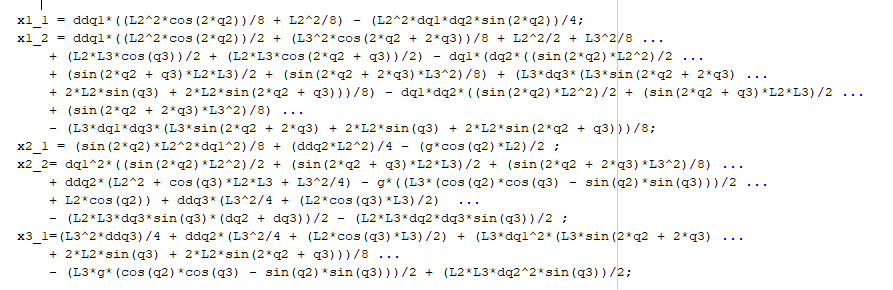

Code below define function that calculates regressor above:

In [7]:

def regressor(q, dq, ddq, l, g):

    alpha_1, alpha_2  , alpha_3 = q
    dalpha_1, dalpha_2, dalpha_3 = dq
    ddalpha_1, ddalpha_2, ddalpha_3 = ddq

    Y = zeros((3,9))
   
    # Joint 1
   
    Y[0,1] = ddalpha_1
    Y[0,2] = dalpha_1
    Y[0,3] = ddalpha_1*((l[1]**2*cos(2*alpha_2))/8+l[1]**2/8)-(l[1]**2*dalpha_1*dalpha_2*sin(2*alpha_2))/4
    Y[0,4] = ddalpha_1  
    Y[0,6] = ddalpha_1 *((l[1]**2*cos(2*alpha_2))/2+(l[2]**2*cos(2*alpha_2+2*alpha_3))/8+l[1]**2/2+l[2]**2/8   
            + (l[1]*l[2]*cos(alpha_3))/2+ (l[1]*l[2]*cos(2*alpha_2+alpha_3))/2)     \
            - dalpha_1*(dalpha_2*((sin(2*alpha_2)*l[1]**2)/2 + (sin(2*alpha_2+alpha_3)*l[1]*l[2])/2        \
            +(sin(2*alpha_2+2*alpha_3)*l[2]**2)/8) + (l[2]*dalpha_3*(l[2]*sin(2*alpha_2+2*alpha_3)          
            + 2*l[1]*sin(alpha_3) + 2*l[1]*sin(alpha_2+alpha_3)))/8)                                         \
            - dalpha_1*dalpha_2*((sin(2*alpha_2)*l[1]**2)/2+sin(2*alpha_2+alpha_3)*l[1]*l[2])/2 + (sin(2*alpha_2+alpha_3)*l[2]**2)/8       \
            - (l[2]*dalpha_1*dalpha_3)*(l[2]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+alpha_3))/8   
                          
    Y[0,7] = ddalpha_1  

    # Joint 2
    Y[1,3] = (sin(2*alpha_2)*l[1]**2*dalpha_1**2)/8 + (ddalpha_2*l[1]**2)/4 -(g*cos(alpha_2)*l[1])/2
    Y[1,4] = ddalpha_2
    Y[1,5] = dalpha_2
    Y[1,6] = (dalpha_1**2)*((sin(2*alpha_2)*l[1]**2)/2+(sin(2*alpha_2+alpha_3)*l[1]*l[2])/2+(sin(2*alpha_2+2*alpha_3)*l[2]**2)/8) \
    +ddalpha_2*(l[1]**2+cos(alpha_3)*l[1]*l[2]+l[2]**2/4) \
    - g *((l[2]*(cos(alpha_2)*cos(alpha_3)-sin(alpha_2)*sin(alpha_3)))/2+ l[1]*cos(alpha_2)) \
    + ddalpha_3*(l[2]**2/4 + (l[1]*cos(alpha_3)*l[2])/2)-(l[1]*l[2]*ddalpha_3*sin(alpha_3)*(dalpha_2+dalpha_3))/2 \
    - (l[1]*l[2]*dalpha_2*dalpha_3*sin(alpha_3))/2 
    Y[1,6] = ddalpha_2 + ddalpha_3

    # Joint 3
    Y[2,6] = (l[2]**2*ddalpha_3)/4  +  ddalpha_2*(l[2]**2/4+(l[1]*cos(alpha_3)*l[2])/2) + (l[2]*dalpha_1**2*(l[2]*sin(2*alpha_2+2*alpha_3) \
    +2*l[1]*sin(alpha_3)+2*l[1]*sin(2*alpha_2+alpha_3)))/8 - (l[2]*g*(cos(alpha_2)*cos(alpha_3)- sin(alpha_2)*sin(alpha_3)))/2 \
    +(l[1]*l[2]*dalpha_2**2*sin(alpha_3))/2


    Y[2,7] = ddalpha_2 + ddalpha_3
    Y[2,8] = dalpha_3

    return Y


## **Controller Design**
### **Inverse Dynamics, Exact Compensation, Error Dynamics.**

As we already know, as soon as all parameters $\mathbf{p}$ are know and, assuming that $\mathbf{u} = \mathbf{Q}$ system above may be linearized by control law (inverse dynamics):
\begin{equation}
\begin{cases}
\mathbf{u}  = \mathbf{D}(\mathbf{q}) \mathbf{v} + \mathbf{h}(\mathbf{q}, \mathbf{\dot{q}})= \mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\mathbf{v})\mathbf{p}  \\
\mathbf{v} = \ddot{\mathbf{q}}_d + \mathbf{K}_2 \dot{\tilde{\mathbf{q}}}+ \mathbf{K}_1 \tilde{\mathbf{q}}
\end{cases}
\end{equation}

Where, $\mathbf{q}_{d}$ desired angles, $\tilde{\mathbf{q}} =  \mathbf{q}_{d} - \mathbf{q}$ control error, $\mathbf{K}_1,\mathbf{K}_2$ are positive definite symmetric gain matrices. 

Substitution of this controller to the  of the system dynamics yields following linear system:
\begin{equation}
\ddot{\tilde{\mathbf{q}}} + \mathbf{K}_2 \dot{\tilde{\mathbf{q}}}+ \mathbf{K}_1 \tilde{\mathbf{q}} = \mathbf{0}
\end{equation}
thus, error dynamics is assymptotically stable and converges to the origin. 

Let us now simulate response of the controller above for particular case of remotely driven manipulator, first we define system ODE

In [8]:

def sysode(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    ddq = dot(inv(Dm), u - hm )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)


Now we implement controller in regressor form

In [9]:
def control(x, t, control_params):
    q, dq = x[:3], x[3:6]
    trajectory_params, gains, params_hat = control_params
    
    l, m, J, b, g = params_hat

    q_d, dq_d, ddq_d = trajectory(t, trajectory_params)
    
    K1, K2 = gains
    v =  ddq_d + dot(K1, q_d - q) + dot(K2, dq_d - dq)

    p = [m[0], J[0], b[0], m[1], J[1], b[1], m[2], J[2], b[2] ] 
    u = dot(regressor(q, dq, v , l, g), p)

    return u    

We will consider regulation to the desired state:

In [179]:
def trajectory(t, trajectory_params):
    q_d  = trajectory_params['q_d']
    n = len(q_d)
    dq_d = zeros(n)
    ddq_d  = zeros(n)
    return q_d, dq_d, ddq_d


#def trajectory(t, trajectory_params):
#    q_d  = sin(2*t), cos(2*t), sin(t)
#    n = len(q_d)
#    dq_d = 2*cos(2*t), - 2*sin(2*t), cos(t)
#    ddq_d  = -4*sin(2*t),  - 4*cos(2*t), -sin(t)
#    return q_d, dq_d, ddq_d

Controller parameters are defined below:

In [180]:
# Manipulator parameters
l = 0.3, 0.3 ,0.3
m = 0.5, 2.0  , 0.5
J = 0.01, 0.01 , 0.01
b = 0.02, 0.02 , 0.02
g = 9.81

params = l, m, J, b, g

trajectory_params = {'q_d':[pi/3, pi/4,pi/3], # Set point
                     }
K1 = diag([2, 2, 2])
K2 = diag([100, 100 ,100])
gains = K1, K2

# Exact controller
control_params = trajectory_params, gains, params

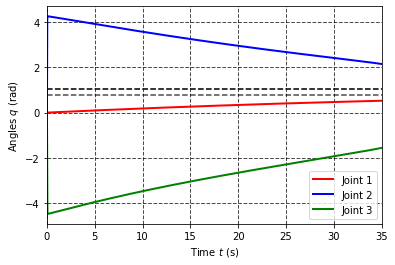

In [181]:

from scipy.integrate import odeint


# Integration
t0 = 0 # Initial time 
tf = 35 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
x0 = [0, 0, 0, 0, 0, 0] # Set initial state 
sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q_exct, dq_exct = sol[:,:3], sol[:,3:6]
alpha_1_exct, alpha_2_exct, alpha_3_exct = q_exct[:,0], q_exct[:,1], q_exct[:,2]

from matplotlib.pyplot import *
plot(t, alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')
# plot(t,sin(2*t), color = 'black', linestyle = '--', alpha = 0.7)
# plot(t,cos(2*t), color = 'black', linestyle = '--', alpha = 0.7)
hlines(trajectory_params['q_d'][0], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(trajectory_params['q_d'][1], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(trajectory_params['q_d'][2], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

### **Approximate Controller, Error Dynamics.**

However, if one will consider more realistic scenario of uncertaint parameters $\mathbf{\tilde{p}} = \hat{\mathbf{p}} - \mathbf{p}$, controller above will be written as:
\begin{equation}
\mathbf{u}  = \hat{\mathbf{D}}(\mathbf{q}) \mathbf{v} + \hat{\mathbf{h}}(\mathbf{q}, \mathbf{\dot{q}})= \mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\mathbf{v})\hat{\mathbf{p}}
\end{equation}

Substitution to the system dynamics gives:
\begin{equation}
\mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\mathbf{v})\hat{\mathbf{p}} =  
\mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\ddot{\mathbf{q}})\mathbf{p}
\end{equation}

Subtracting $\mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\ddot{\mathbf{q}})\hat{\mathbf{p}}$ from both sides of the above, yields:

\begin{equation}
\big(\mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\mathbf{v}) - \mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\ddot{\mathbf{q}})\big)\hat{\mathbf{p}} =
 \hat{\mathbf{D}} (\ddot{\tilde{\mathbf{q}}} + \mathbf{K}_2 \dot{\tilde{\mathbf{q}}}+ \mathbf{K}_1 \tilde{\mathbf{q}})
 = -\mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\ddot{\mathbf{q}})\tilde{\mathbf{p}}
\end{equation}

Thus, in case of approximate compensation error dynamics yields:
\begin{equation}
 \ddot{\tilde{\mathbf{q}}} + \mathbf{K}_2 \dot{\tilde{\mathbf{q}}}+ \mathbf{K}_1 \tilde{\mathbf{q}}
 = -\hat{\mathbf{D}}^{-1}\mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\ddot{\mathbf{q}})\tilde{\mathbf{p}}
\end{equation}


Now we are ready to simulate system response:

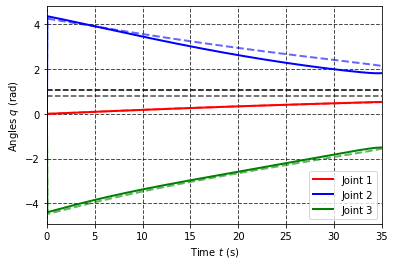

In [182]:
# Set parameter guess
m_0 = 0.5, 1.0 , 0.5
b_0 = 0.0, 0.0 , 0.0 
g = 9.81

params_hat = l, m_0, J, b_0, g
control_params_aprox = trajectory_params, gains, params_hat

sol = odeint(sysode, x0, t, 
             args=(control, params, control_params_aprox,)) # Integrate system
q_aprox, dq_aprox = sol[:,:3], sol[:,3:6]
alpha_1_aprox, alpha_2_aprox,alpha_3_aprox = q_aprox[:,0], q_aprox[:,1], q_aprox[:,2]


from matplotlib.pyplot import *
plot(t, alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')
hlines(trajectory_params['q_d'][0], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(trajectory_params['q_d'][1], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(trajectory_params['q_d'][2], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
plot(t, alpha_1_exct,'r--', linewidth=2.0, alpha = 0.6)
plot(t, alpha_2_exct,'b--', linewidth=2.0, alpha = 0.6)
plot(t, alpha_3_exct,'g--', linewidth=2.0, alpha = 0.6)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

As can be seen from the graph above, the parameter uncertainty acts as a disturbance at all joints, moreover, there is some under-damping at second joint, which is undesirable. 

so from our practice, an adaptive controller is better to deal with this problem.